<div align="right"> Calculatoare și Tehnologia Informației, anul I </div>
<div align="right"> Proiect Calcul Numeric </div>
<div align="right"> Studenți: Bălan Mihai, Litu Bogdan </div>
<div align="right"> 2024-2025 </div>


# <div align="center"> Rezolvarea numerică a ecuației de difuzie a căldurii pentru un dreptunghi în două dimensiuni </div>

### Pasul 1: Discretizarea domeniului
Pentru a discretiza dreptunghiul Ω = [0,2] × [0,1] vom discretiza cele două axe folosind un număr de noduri pe ordonată și abscisă astfel încât pasul $h$ dintre 2 noduri consecutive să fie $h = h1 = h2$, unde $h1$ pasul pe Ox și $h2$ pasul pe Oy

Astfel, alegem $n+1 = 2*m + 1$ noduri pentru axa Ox și $m+1$ noduri pentru axa Oy.

Pentru a putea vizualiza efectele creșterii numărului de noduri și, automat, ale descreșterii pasului $h$, vom avea nevoie de o funcție care să determine $h$ cu formula $$h = \frac{valoarea\ extrema\ a\ intervalului}{numarul\ de\ noduri - 1}$$

Pentru cazul dreptunghiului, vom avea 2 valori ale lui $h, $ $h1$ și $h2$, corespunzătoare axelor Ox, respectiv Oy.
Modul în care l-am ales aici, după cum se observă și mai jos, garantează $h1 = h2$



In [1]:
#Exemplu unde m+1 = nr de noduri pe Oy, n+1 nr de noduri pe Ox, L = valoarea extrema a intervalului pe (1) Ox si (2) Oy
def discretizareDomeniu(m):
    n = 2*m
    L1, L2 = 2, 1
    h1, h2 = L1/n, L2/m
    print("Pasul dintre cele {0} noduri de pe Ox, respectiv {1} noduri de pe Oy este: {2}, respectiv {3}".format(n+1, m+1, h1, h2))
    print("Vom avea {0} noduri".format((n+1)*(m+1)))
    if(h1 == h2):
        h = h1 #daca sunt egale, "unim" definitia
    return n, h

m0 = 3
n0, h0 = discretizareDomeniu(m0)


Pasul dintre cele 7 noduri de pe Ox, respectiv 4 noduri de pe Oy este: 0.3333333333333333, respectiv 0.3333333333333333
Vom avea 28 noduri


### Pașii 2 și 3: Discretizarea ecuației și rezolvarea sistemului
În urma acestui pas, vom obține $(n-1)*(m-1)$ ecuații liniare corespunzătoare nodurilor interioare.

Adăugând cele $2*(n+m)$ valori de la frontieră, obținem un sistem cu $(n+1)*(m+1)$ ecuații, respectiv necunoscute.

Este necesar să rezolvăm acest sistem pentru a reprezenta grafic subiectul acestui proiect.



#### Problema 1: Porțiunea pe care se aplică date Dirichlet
Funcția $g_{D}(x,y)$ întoarce valori cunoscute pe frontiera dreptunghiului și trebuie definită.

Deoarece toate laturile guvernate de datele Dirichlet au valoarea 0 (izolare termică), nu apare problema colțurilor. 

Din modul în care sunt calculați $x$ și $y$, pot apărea erori din cauza tipului de date $float$. Cum această funcție nu este apelată decât atunci când nodul este pe frontieră, se poate introduce eroarea acceptată $eps$.

In [3]:
def gD(x, y):
    if 0 - eps <= y <= 0 + eps:
        return v2
    if 1 - eps <= y <= 1 + eps:
        return v3
    if 2 - eps <= x <= 2 + eps:
        return v1

v1, v2, v3 = 0, 0, 0
eps = 1e-10
print("Datele Dirichlet: ",gD(2,0.5), gD(1,0), gD(1,1), "(°C)")

Datele Dirichlet:  0 0 0 (°C)


#### Problema 2: Porțiunea pe care se aplică date Neumann
Am ales latura din stânga (fără colțuri) să fie guvernată de date Neumann. Drept urmare, pentru nodurile $N_{j*(n+1)},\ unde\ 0 < j < m+1$, se schimbă modul în care sunt aflate valorile $U_{j*(n+1)}$ corespunzătoare și, automat, și structura blocurilor ce compun matricea $A$ de coeficienți (mai exact, primul rând al celor de tip $Akk$).

Inițial, fluxul va fi 0, fiind cazul de izolare termică, așa cum este și pe laturile cu date Dirichlet.

In [5]:
def gN(x, y):
    if 0 - eps <= x <= 0 + eps and 0 < y < 1:
        return s
    return 0

s = 0
print("Datele Neumann: ", gN(0, 0.5), "(W/m^2)")

Datele Neumann:  0 (W/m^2)


#### Problema 3: Variabilitatea conductivițății termice a materialului
Funcția $k(x,y)$ va lua valori diferite în puncte diferite și va influența calculele în continuare. Este necesară o definiție a acesteia, și ne va veni în ajutor și stocarea valorilor pentru fiecare nod $N_{x}\ :$ $$x = i+j*(n+1),\ unde\ 0 \leq j \leq m \ si\ 0 \leq i \leq n  $$

Așadar, construim vectorul-coloană $K$, de dimensiune $(n+1)*(m+1)$.



Drept exemplu, t1, t2, t3 și t4 vor avea valorile k ale oțelului inoxidabil, titanului, plumbului, respectiv manganului.

In [7]:
import numpy as np

def k(x, y):
    if 0 <= x <= 1 and 0 <= y <= 0.5:
        return t1
    if 1 < x <= 2 and 0 <= y <= 0.5:
        return t2
    if 1 < x <= 2 and 0.5 < y <= 1:
        return t3
    if 0 <= x <= 1 and 0.5 < y <= 1:
        return t4
    return 0

t1, t2, t3, t4 = 16, 17, 15, 14
print("Valorile conductivitatii termice: ",k(0,0), k(2,0), k(2,1), k(0,1), " (W/m*K)")

def determinareK(n, m, h):
    nrEcuatii = (n+1)*(m+1)
    K = np.zeros((nrEcuatii, 1))
    for j in range(m+1):
        for i in range(n+1):
            #x va fi 0 + i * h, iar y va fi 0 + j * h
            x = 0 + i * h
            y = 0 + j * h
            t = i + j * (n+1) #obtin indexul corespunzator coloanei i de pe linia j
            if i in range(1, n) and j in range(1, m): #daca sunt interne
                K[t] = k(x,y)
            elif i==0 and j in range(1, m): #daca se aplica date Neumann
                K[t] = k(x,y)
            else:
                K[t] = 1 #nu ma intereseaza valorile k de la frontiera
    return K
    

K = determinareK(n0, m0, h0)

print(K)
print("Obtinem {0} rezultate".format(K.shape[0]))

Valorile conductivitatii termice:  16 17 15 14  (W/m*K)
[[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [16.]
 [16.]
 [16.]
 [16.]
 [17.]
 [17.]
 [ 1.]
 [14.]
 [14.]
 [14.]
 [14.]
 [15.]
 [15.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]]
Obtinem 28 rezultate


#### Problema 4: Sursa internă de căldură a materialului
Funcția care reprezintă această sursă de căldură trebuie aleasă și definită pentru a putea crea vectorul-coloană $F$, de dimensiune $(n+1)*(m+1)$, necesar în rezolvarea sistemului.

În cazul nostru, alegem $f(x,y) = sin(2*x*y)$ și determinăm $F$.

Cum $F$ este 1-dimensional, acesta nu poate „ține minte” explicit pe ce rând și coloană calculează $F[k]$, așa că folosesc aceeași logică cu care au fost numerotate nodurile la curs: $$k = i+j(n+1),\ unde\ 0 \leq j \leq m \ si\ 0 \leq i \leq n  $$

Rezultatul? Este calculat $f(x,y)$ în fiecare nod, pornind din colțul stânga-jos, iar rezultatul este stocat în $F$ pentru a fi folosit mai târziu.

In [9]:
import numpy as np

def f(x,y):
    return np.sin(2*x*y)

def determinareF(n, m, h):
    nrEcuatii = (n+1)*(m+1)
    F = np.zeros((nrEcuatii, 1))
    for j in range(m+1):
        for i in range(n+1):
            #x va fi 0 + i * h, iar y va fi 0 + j * h
            x = 0 + i * h
            y = 0 + j * h
            k = i + j * (n+1) #obtin indexul corespunzator coloanei i de pe linia j
            if i in range(1, n) and j in range(1, m): #daca sunt interne
                F[k] = f(x,y)
            elif i==0 and j in range(1, m): #daca se aplica date Neumann
                F[k] = gN(x,y)
            else:
                F[k] = gD(x,y) #daca se aplica date Dirichlet
    return F
    

F = determinareF(n0, m0, h0)

print(F)
print("Obtinem {0} rezultate".format(F.shape[0]))


[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.22039774]
 [0.42995636]
 [0.6183698 ]
 [0.77637192]
 [0.8961922 ]
 [0.        ]
 [0.        ]
 [0.42995636]
 [0.77637192]
 [0.9719379 ]
 [0.9786557 ]
 [0.79522006]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]
Obtinem 28 rezultate


#### Unde am ajuns, ce mai lipsește?
Până acum, pas cu pas, am rezolvat problemele care apar din dorința noastră de a afla funcția $u(x,y)$.

Știm că se va ajunge la sistemul de $(n+1)*(m+1)$ ecuații, iar, pentru a-l rezolva, putem folosi ce am învățat semestrul acesta referitor la subiect. Așadar, vom avea: $$A * U = F$$ unde $A$ este matricea pătratică cu $(n+1)*(m+1)$ linii și coloane, iar $U$ și $F$ vectorii-coloană cu $(n+1)*(m+1)$ termeni.

U este coloana cu necunoscute, iar $A$ matricea care stă la baza elucidării misterului reprezentat de $U$.

Automat, apar următoarele lipsuri:
* Reprezentarea lui $A$ în Python, pe baza estimării operatorului $Δ$ în nodurile interioare și funcției $k(x,y)$
* Rezolvarea sistemului
* Interpolarea aproximării
* Calculul erorii


#### Problema 5: Reprezentarea lui A
Așa cum am văzut, A poate fi scrisă pe blocuri. Vom implementa acele blocuri, rând cu rând. Modul în care am făcut discretizarea pe cazul nostru garantează că $h1 = h2$, așadar nu sunt produse modificări la scrierea pe blocuri.

Matricele identitate și nulă vor fi de dimensiunea $(n+1)$: $I_{n+1}$ și $O_{n+1}$.

În plus, vom întâlni cele două (sau trei, deși se reduc la două) tipuri de matrice: $A_{k,k}$ și $A_{k+1,k}$ (identică cu $A_{k-1,k}$).

Strategia este să compunem, rând (de bloc) cu rând, cu $hstack$, matricea $A$, ocupându-ne, mai întâi, de aceste 2 tipuri de matrice.

Primul tip se va numi $Akk$, iar al doilea $Aik$, pentru a simboliza condițiile necesare pentru încadrarea la unul dintre tipuri.

$A$ va avea $m+1$ rânduri și coloane (de bloc).

Pentru a pune în evidență variabilitatea lui $k$, observăm că este destul să înmulțim fiecare rând (de matrice) care conține coeficienții unei ecuații ce are în componență un $U_{i}$ (astfel încât nodul interior corespunzător este $N_{i}$), cu valoarea $k(x,y)$ 


In [11]:
import numpy as np

A = np.array([])

def aplicareK(rand_curent, i, j, n):
    indiceNodStartRand = i*(n+1)
    indiceNodCurent = indiceNodStartRand
    for j in range(0, n): #inmultesc cu k toate ecuatiile mai putin ultima
        rand_curent[j] *= K[indiceNodCurent]
        indiceNodCurent += 1
    return

def determinareA(n, m, h):
    val1h = -1 / pow(h,2)
    val4h = 4 / pow(h,2)

    I = np.eye(n+1)
    O = np.zeros((n+1, n+1))
    
    Aik = np.eye(n-1) * val1h
    Aik = np.pad(Aik, pad_width=1, mode='constant', constant_values=0)
    
    Akk = np.eye(n+1)
    index_start = 0 #de unde incep sa pun cele 3 valori

    #primul rand - date Neumann
    Akk[0][0] = -3 / (2*h)
    Akk[0][1] = 2 / h
    Akk[0][2] = -1 / (2*h)
    
    for i in range(1, n):
        for j in range(n-1): #va merge pana la (n+1) - 3
            if j == index_start:
                Akk[i][j] = val1h
                Akk[i][j+1] = val4h
                Akk[i][j+2] = val1h
                index_start += 1
                break

    
    index_start = -1 #de unde incep sa pun cele 3 blocuri cu valori (primul rand nu va contine Aik sau Akk)
    j = 0
    modificat_artificial = 0
    rand_anterior = np.array([])
    for i in range(m+1):
        modificat_artifical = 0
        while(j < m+1): #pentru ca o sa ii schimb valoarea in cod
            if i == 0:
                if j == 0:
                    rand_curent = I
                else:
                    rand_curent = np.hstack((rand_curent, O))
                rand_anterior = rand_curent
            
            elif i < m: #daca i este in interior
                if index_start == 0:
                    rand_curent = np.hstack((Aik, Akk, Aik))
                    index_start+=1
                    modificat_artificial = 1
                    aplicareK(rand_curent, i, j, n)
                    j+=3 #sar peste cele 3 blocuri
                elif j == 0:
                    rand_curent = O #initializarea depinde de indexul de start
                if j == index_start:
                    rand_curent = np.hstack((rand_curent, Aik, Akk, Aik))
                    aplicareK(rand_curent, i, j, n)
                    j+=3 #sar peste cele 3 blocuri
                    index_start+=1
                if j < m+1 and j != 0:
                    #daca mai am loc, adaug O (pot fi inainte sau dupa "trenul" de Aik, Akk)
                    rand_curent = np.hstack((rand_curent, O))
                    
            else: #daca i este jos
                if j == 0:
                    rand_curent = O
                elif j < m:
                    rand_curent = np.hstack((rand_curent, O))
                else:
                    rand_curent = np.hstack((rand_curent, I))
            
            j+=1    
        
        try: 
            if i != 0:
                rand_anterior = np.vstack((rand_anterior, rand_curent))
        except:
            print("eroare:",i,j ,rand_anterior.shape, rand_curent.shape)
        j=0
        if modificat_artificial == 0:
            index_start+=1
    A = np.copy(rand_anterior)
    
    return A

A = determinareA(n0,m0,h0)

print("Matricea A de forma {0} x {1}:\n{2}".format(A.shape[0],A.shape[1],A))

Matricea A de forma 28 x 28:
[[   1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.]
 [   0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.]
 [   0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.]
 [   0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.]
 [   0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.
     0.    0.    0.   

#### Problema 6: Rezolvarea sistemului
Din modul în care este alcătuit A, suntem siguri că acesta va avea rangul maxim. Cu alte cuvinte, sistemul este liniar și poate fi folosită o factorizare, spre exemplu, LU, apoi substituțiile ascendentă/descendentă, după caz. În urma testelor, am ajuns la concluzia că cele scrise de noi duc la timpi de execuție foarte ridicați, așa că apelăm la $numpy.linalg.solve$, care folosește factorizarea LU și metoda Gauss cu pivotare parțială.

În urma unei comparații „side-by-side” a lui $F$ cu $Faprox$, se poate observa că, deși știm că elementele unele elemente ar trebui să fie egale cu 0, obținem valori diferite, apropiate de 0. 

În acest scop, vom da un exemplu ușor de urmărit, care să evidențieze toate aceste erori, unde $m_{1} = 4$, iar restul „componentelor” sunt calculate folosind funcțiile anterioare.

In [13]:
import numpy as np

m1 = 4
n1,h1 = discretizareDomeniu(m1)

F = determinareF(n1,m1,h1)
K = determinareK(n1,m1,h1)
A = determinareA(n1,m1,h1)

U = np.linalg.solve(A, F)

Faprox = A@U

print("Vectorii-coloana Faprox si F, unul langa celalalt: \n",np.c_[Faprox, F])

Pasul dintre cele 9 noduri de pe Ox, respectiv 5 noduri de pe Oy este: 0.25, respectiv 0.25
Vom avea 45 noduri
Vectorii-coloana Faprox si F, unul langa celalalt: 
 [[ 0.00000000e+00  0.00000000e+00]
 [ 2.19008839e-17  0.00000000e+00]
 [ 4.07660017e-17  0.00000000e+00]
 [-6.37510877e-17  0.00000000e+00]
 [ 3.46944695e-17  0.00000000e+00]
 [ 1.63268092e-18  0.00000000e+00]
 [ 6.53072367e-18  0.00000000e+00]
 [ 2.40820435e-17  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.24674733e-01  1.24674733e-01]
 [ 2.47403959e-01  2.47403959e-01]
 [ 3.66272529e-01  3.66272529e-01]
 [ 4.79425539e-01  4.79425539e-01]
 [ 5.85097273e-01  5.85097273e-01]
 [ 6.81638760e-01  6.81638760e-01]
 [ 7.67543502e-01  7.67543502e-01]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.47403959e-01  2.47403959e-01]
 [ 4.79425539e-01  4.79425539e-01]
 [ 6.81638760e-01  6.81638760e-01]
 [ 8.41470985e-01  8.41470985e-01]
 [ 9.48984619e-01  9.48984619e-

### Toate funcțiile în aceeași celulă:

Aici se poate vedea programul care, rulat de sine stătător, rezolvă sistemul $$A * U = F$$ cu toate definițiile anterioare.

In [4]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize, linewidth = sys.maxsize, suppress = 0)

def discretizareDomeniu(m):
    n = 2*m
    L1, L2 = 2, 1
    h1, h2 = L1/n, L2/m
    print("Pasul dintre cele {0} noduri de pe Ox, respectiv {1} noduri de pe Oy este: {2}, respectiv {3}".format(n+1, m+1, h1, h2))
    print("Vom avea {0} noduri".format((n+1)*(m+1)))
    if(h1 == h2):
        h = h1 #daca sunt egale, "unim" definitia
    return n, h

def gD(x, y):
    if 0 - eps <= y <= 0 + eps:
        return v2
    if 1 - eps <= y <= 1 + eps:
        return v3
    if 2 - eps <= x <= 2 + eps:
        return v1
    return 0


def gN(x, y):
    if 0 - eps <= x <= 0 + eps and 0 < y < 1:
        return s
    return 0



def k(x, y):
    if 0 <= x <= 1 and 0 <= y <= 0.5:
        return t1
    if 1 < x <= 2 and 0 <= y <= 0.5:
        return t2
    if 1 < x <= 2 and 0.5 < y <= 1:
        return t3
    if 0 <= x <= 1 and 0.5 < y <= 1:
        return t4
    return 0

def determinareK(n, m, h):
    nrEcuatii = (n+1)*(m+1)
    K = np.zeros((nrEcuatii, 1))
    for j in range(m+1):
        for i in range(n+1):
            #x va fi 0 + i * h, iar y va fi 0 + j * h
            x = 0 + i * h
            y = 0 + j * h
            t = i + j * (n+1) #obtin indexul corespunzator coloanei i de pe linia j
            if i in range(1, n) and j in range(1, m): #daca sunt interne
                K[t] = k(x,y)
            elif i==0 and j in range(1, m): #daca se aplica date Neumann
                K[t] = k(x,y)
            else:
                K[t] = 1 #nu ma intereseaza valorile k de la frontiera
    return K
def f(x,y):
    return np.sin(2*x*y)

def determinareF(n, m, h):
    nrEcuatii = (n+1)*(m+1)
    F = np.zeros((nrEcuatii, 1))
    for j in range(m+1):
        for i in range(n+1):
            #x va fi 0 + i * h, iar y va fi 0 + j * h
            x = 0 + i * h
            y = 0 + j * h
            k = i + j * (n+1) #obtin indexul corespunzator coloanei i de pe linia j
            if i in range(1, n) and j in range(1, m): #daca sunt interne
                F[k] = f(x,y)
            elif i==0 and j in range(1, m): #daca se aplica date Neumann
                F[k] = gN(x,y)
            else:
                F[k] = gD(x,y) #daca se aplica date Dirichlet
    return F

A = np.array([])

def aplicareK(rand_curent, i, j, n):
    indiceNodStartRand = i*(n+1)
    indiceNodCurent = indiceNodStartRand
    for j in range(0, n): #inmultesc cu k toate ecuatiile mai putin ultima
        rand_curent[j] *= K[indiceNodCurent]
        indiceNodCurent += 1
    return

def determinareA(n, m, h):
    val1h = -1 / pow(h,2)
    val4h = 4 / pow(h,2)

    I = np.eye(n+1)
    O = np.zeros((n+1, n+1))
    
    Aik = np.eye(n-1) * val1h
    Aik = np.pad(Aik, pad_width=1, mode='constant', constant_values=0)
    
    Akk = np.eye(n+1)
    index_start = 0 #de unde incep sa pun cele 3 valori

    #primul rand - date Neumann
    Akk[0][0] = -3 / (2*h)
    Akk[0][1] = 2 / h
    Akk[0][2] = -1 / (2*h)
    
    for i in range(1, n):
        for j in range(n-1): #va merge pana la (n+1) - 3
            if j == index_start:
                Akk[i][j] = val1h
                Akk[i][j+1] = val4h
                Akk[i][j+2] = val1h
                index_start += 1
                break

    
    index_start = -1 #de unde incep sa pun cele 3 blocuri cu valori (primul rand nu va contine Aik sau Akk)
    j = 0
    modificat_artificial = 0
    rand_anterior = np.array([])
    for i in range(m+1):
        modificat_artifical = 0
        while(j < m+1): #pentru ca o sa ii schimb valoarea in cod
            if i == 0:
                if j == 0:
                    rand_curent = I
                else:
                    rand_curent = np.hstack((rand_curent, O))
                rand_anterior = rand_curent
            
            elif i < m: #daca i este in interior
                if index_start == 0:
                    rand_curent = np.hstack((Aik, Akk, Aik))
                    index_start+=1
                    modificat_artificial = 1
                    aplicareK(rand_curent, i, j, n)
                    j+=3 #sar peste cele 3 blocuri
                elif j == 0:
                    rand_curent = O #initializarea depinde de indexul de start
                if j == index_start:
                    rand_curent = np.hstack((rand_curent, Aik, Akk, Aik))
                    aplicareK(rand_curent, i, j, n)
                    j+=3 #sar peste cele 3 blocuri
                    index_start+=1
                if j < m+1 and j != 0:
                    #daca mai am loc, adaug O (pot fi inainte sau dupa "trenul" de Aik, Akk)
                    rand_curent = np.hstack((rand_curent, O))
                    
            else: #daca i este jos
                if j == 0:
                    rand_curent = O
                elif j < m:
                    rand_curent = np.hstack((rand_curent, O))
                else:
                    rand_curent = np.hstack((rand_curent, I))
            
            j+=1    
        
        try: 
            if i != 0:
                rand_anterior = np.vstack((rand_anterior, rand_curent))
        except:
            print("eroare:",i,j ,rand_anterior.shape, rand_curent.shape)
        j=0
        if modificat_artificial == 0:
            index_start+=1
    A = np.copy(rand_anterior)
    
    return A

#constante, variabile pentru a genera exemple
v1, v2, v3 = 0, 0, 0
s = 0
eps = 1e-10
t1, t2, t3, t4 = 16, 17, 15, 14

m = 30
n,h = discretizareDomeniu(m)

F = determinareF(n,m,h)
K = determinareK(n,m,h)
A = determinareA(n,m,h)

U = np.linalg.solve(A,F)


Faprox = A@U

Pasul dintre cele 61 noduri de pe Ox, respectiv 31 noduri de pe Oy este: 0.03333333333333333, respectiv 0.03333333333333333
Vom avea 1891 noduri


### Vizualizarea datelor
Așa cum l-am setat, codul de mai jos rezolvă sistemul pentru $m = 30$, adică 1891 de noduri.

$v1 = v2 = v3 = 70$ va reprezenta faptul că, pe laturile guvernate de datele Dirichlet, avem o temperatură de $70°C$.

$s = 100$ indică fluxul de $100 \frac{W}{m^2}$ de pe latura din stânga.

Pentru a putea vizualiza U, este nevoie să îl redefinim ca o matrice cu $m+1$ linii și $n+1$ coloane.

Folosim algoritmul de interpolare cu spline liniar pentru a face o interpolare biliniară, folosindu-ne de toate punctele în care am aproximat $u(x,y)$ pentru a estima comportamentul funcției în punctele dintre $x$ și $y$, fără să fie nevoie să le calculăm efectiv.

Astfel, între 4 valori cunoscute ale funcției, determinate de coordonatele $(x_{0}, y_{0})$, $(x_{0}, y_{1})$, $(x_{1}, y_{0})$ și $(x_{1}, y_{1})$ aplicăm de 3 ori funcția $spline\_liniar$:
* prima dată, evaluată în punctul $y_{0}$ în funcție de $x_{0}, x_{1}$
* a doua, în $y_{1}$ cu aceleași puncte
* a treia, evaluată în punctele obținute anterior în funcție de $y_{0}, y_{1}$


Pasul dintre cele 41 noduri de pe Ox, respectiv 21 noduri de pe Oy este: 0.05, respectiv 0.05
Vom avea 861 noduri


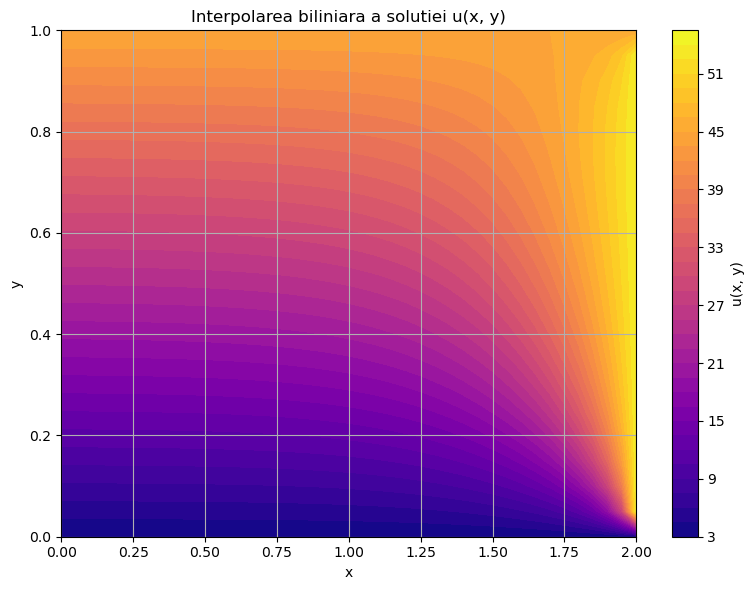

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def spline_liniar(X, Y, x):
    n = len(X) - 1
    #x nu trebuie sa iasa din limite
    x = max(X[0], min(X[-1], x))
    for i in range(n):
        if X[i] <= x <= X[i+1]:
            panta = (Y[i+1] - Y[i]) / (X[i+1] - X[i])
            intersectia = Y[i] - panta * X[i]
            return panta * x + intersectia
    return Y[-1]  #daca x depaseste domeniul, luam ultima valoare


def interpolare_biliniara(x_grid, y_grid, U_matrice, x, y):
    #x, y nu ies din limitele alese
    x = max(x_grid[0], min(x_grid[-1], x))
    y = max(y_grid[0], min(y_grid[-1], y))
    
    #indicii celulei in care se afla
    i = np.searchsorted(x_grid, x) - 1
    j = np.searchsorted(y_grid, y) - 1
    
    #i, j nu trebuie sa depaseasca limita inferioara sau superioara
    i = max(0, min(i, len(x_grid) - 2))
    j = max(0, min(j, len(y_grid) - 2))
    
    #Punctele din colturile celulei
    x0, x1 = x_grid[i], x_grid[i+1]
    y0, y1 = y_grid[j], y_grid[j+1]
    
    #Valorile in aceste puncte (deja cunoscute prin rezolvarea sistemului)
    f00 = U_matrice[j, i]      #U(x0, y0)
    f01 = U_matrice[j+1, i]    #U(x0, y1)
    f10 = U_matrice[j, i+1]    #U(x1, y0)
    f11 = U_matrice[j+1, i+1]  #U(x1, y1)
    
    #interpolarea liniara pe Ox la y0 si y1
    fx0 = spline_liniar([x0, x1], [f00, f10], x)
    fx1 = spline_liniar([x0, x1], [f01, f11], x) 
    
    #interpolarea liniara pe Oy
    return spline_liniar([y0, y1], [fx0, fx1], y)

#constante, variabile pentru a genera exemple
v1, v2, v3 = 54, 45, 3
s = 2
eps = 1e-10
t1, t2, t3, t4 = 10, 17, 15, 14

m = 20
n,h = discretizareDomeniu(m)

F = determinareF(n,m,h)
K = determinareK(n,m,h)
A = determinareA(n,m,h)

U = np.linalg.solve(A,F)

Faprox = A@U

U_matrice = U.reshape((m+1, n+1))
U_matrice = np.flipud(U_matrice)

x = np.linspace(0, 2, n+1)
y = np.linspace(0, 1, m+1)
X, Y = np.meshgrid(x, y)
U_interpolat = np.zeros_like(X)

#interpolarea functiei u
for i in range(len(x)):
    for j in range(len(y)):
        U_interpolat[j, i] = interpolare_biliniara(x, y, U_matrice, x[i], y[j])



plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U_interpolat, cmap='plasma', levels=50)
plt.colorbar(contour, label='u(x, y)')
plt.title('Interpolarea biliniara a solutiei u(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.tight_layout()

plt.show()

#### Eroarea
După toți acești pași, obținem o $aproximare$ a lui $u(x,y)$.

Soluția exactă (analitică) care ar putea fi obținută pentru acest set de date presupune calcule complexe, peste nivelul nostru de înțelegere.

Pentru a putea compara o soluție exactă cu cea aproximativă rezultată din codul scris până acum, va fi nevoie să alegem o funcție și niște condiții ce permit rezolvarea:
* $k(x,y) = 1$ constant
* $f(x,y) = -\pi^2 * sin(\pi*x) * sin(\pi*y)$
* $g_{D} = 0$ pe toate laturile, fără Neumann

Astfel, se obține: $$u(x,y) = - \frac{1}{2} * sin(\pi*x) * sin(\pi*y)$$

Pe calea aproximativă, cu interpolare, folosim funcțiile anterioare (cu modificările necesare) pentru mai multe valori ale lui $m$, dar calculăm și $U\_exact$. Se poate observa că, pe măsură ce crește numărul de noduri, pasul $h$ scade deodată cu eroarea maximă.

Linia de referință reprezintă panta pe care ar trebui să o aibă dreapta rezultată pentru a reprezenta ordinul $O(h^2)$ de descreștere a erorii.

Pasul dintre cele 7 noduri de pe Ox, respectiv 4 noduri de pe Oy este: 0.3333333333333333, respectiv 0.3333333333333333
Vom avea 28 noduri
Pasul dintre cele 11 noduri de pe Ox, respectiv 6 noduri de pe Oy este: 0.2, respectiv 0.2
Vom avea 66 noduri
Pasul dintre cele 21 noduri de pe Ox, respectiv 11 noduri de pe Oy este: 0.1, respectiv 0.1
Vom avea 231 noduri
Pasul dintre cele 31 noduri de pe Ox, respectiv 16 noduri de pe Oy este: 0.06666666666666667, respectiv 0.06666666666666667
Vom avea 496 noduri
Pasul dintre cele 41 noduri de pe Ox, respectiv 21 noduri de pe Oy este: 0.05, respectiv 0.05
Vom avea 861 noduri
Pasul dintre cele 51 noduri de pe Ox, respectiv 26 noduri de pe Oy este: 0.04, respectiv 0.04
Vom avea 1326 noduri
Pasul dintre cele 61 noduri de pe Ox, respectiv 31 noduri de pe Oy este: 0.03333333333333333, respectiv 0.03333333333333333
Vom avea 1891 noduri
Pasul dintre cele 71 noduri de pe Ox, respectiv 36 noduri de pe Oy este: 0.02857142857142857, respectiv 0.028571428571428

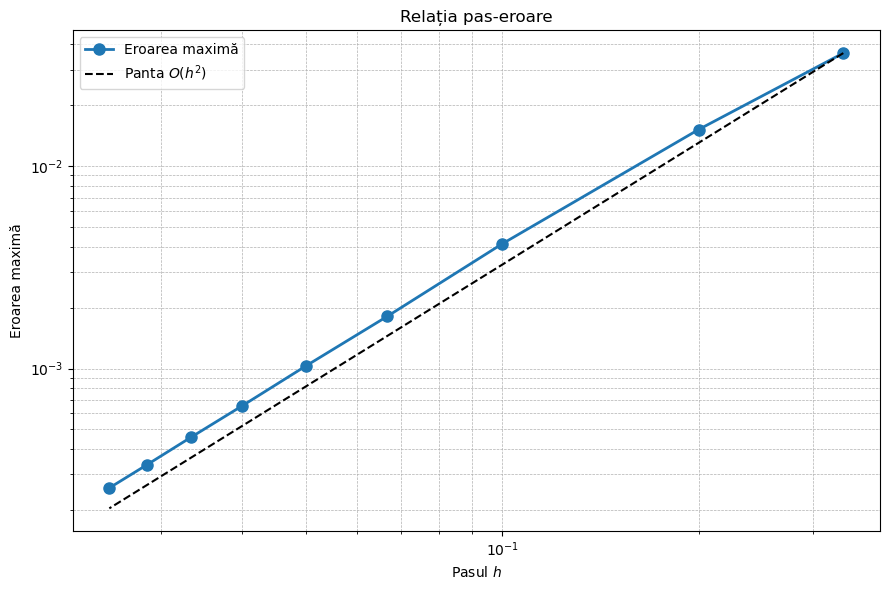

In [120]:
def gD(x, y):
    return 0

def k(x,y):
    return 1

def f(x,y):
    return -(np.pi ** 2) * np.sin(np.pi*x) * np.sin(np.pi*y)

def determinareF(n, m, h):
    nrEcuatii = (n+1)*(m+1)
    F = np.zeros((nrEcuatii, 1))
    for j in range(m+1):
        for i in range(n+1):
            #x va fi 0 + i * h, iar y va fi 0 + j * h
            x = 0 + i * h
            y = 0 + j * h
            k = i + j * (n+1) #obtin indexul corespunzator coloanei i de pe linia j
            if i in range(1, n) and j in range(1, m): #daca sunt interne
                F[k] = f(x,y)
            else:
                F[k] = gD(x,y) #daca se aplica date Dirichlet
    return F

def determinareA(n, m, h):
    val1h = -1 / pow(h,2)
    val4h = 4 / pow(h,2)

    I = np.eye(n+1)
    O = np.zeros((n+1, n+1))
    
    Aik = np.eye(n-1) * val1h
    Aik = np.pad(Aik, pad_width=1, mode='constant', constant_values=0)
    
    Akk = np.eye(n+1)
    index_start = 0 #de unde incep sa pun cele 3 valori
    
    for i in range(1, n):
        for j in range(n-1): #va merge pana la (n+1) - 3
            if j == index_start:
                Akk[i][j] = val1h
                Akk[i][j+1] = val4h
                Akk[i][j+2] = val1h
                index_start += 1
                break

    
    index_start = -1 #de unde incep sa pun cele 3 blocuri cu valori (primul rand nu va contine Aik sau Akk)
    j = 0
    modificat_artificial = 0
    rand_anterior = np.array([])
    for i in range(m+1):
        modificat_artifical = 0
        while(j < m+1): #pentru ca o sa ii schimb valoarea in cod
            if i == 0:
                if j == 0:
                    rand_curent = I
                else:
                    rand_curent = np.hstack((rand_curent, O))
                rand_anterior = rand_curent
            
            elif i < m: #daca i este in interior
                if index_start == 0:
                    rand_curent = np.hstack((Aik, Akk, Aik))
                    index_start+=1
                    modificat_artificial = 1
                    aplicareK(rand_curent, i, j, n)
                    j+=3 #sar peste cele 3 blocuri
                elif j == 0:
                    rand_curent = O #initializarea depinde de indexul de start
                if j == index_start:
                    rand_curent = np.hstack((rand_curent, Aik, Akk, Aik))
                    aplicareK(rand_curent, i, j, n)
                    j+=3 #sar peste cele 3 blocuri
                    index_start+=1
                if j < m+1 and j != 0:
                    #daca mai am loc, adaug O (pot fi inainte sau dupa "trenul" de Aik, Akk)
                    rand_curent = np.hstack((rand_curent, O))
                    
            else: #daca i este jos
                if j == 0:
                    rand_curent = O
                elif j < m:
                    rand_curent = np.hstack((rand_curent, O))
                else:
                    rand_curent = np.hstack((rand_curent, I))
            
            j+=1    
        
        try: 
            if i != 0:
                rand_anterior = np.vstack((rand_anterior, rand_curent))
        except:
            print("eroare:",i,j ,rand_anterior.shape, rand_curent.shape)
        j=0
        if modificat_artificial == 0:
            index_start+=1
    A = np.copy(rand_anterior)
    
    return A

def u(x,y):
    return (-1/2) * np.sin(np.pi*x) * np.sin(np.pi*y)


val_m = [3, 5, 10, 15, 20, 25, 30, 35, 40]
val_h = []
err_max = []

for m in val_m:
    n, h = discretizareDomeniu(m)
    val_h.append(h)

    K = determinareK(n, m, h)
    F = determinareF(n, m, h)
    A = determinareA(n, m, h)
    U = np.linalg.solve(A, F)

    U_matrice = U.reshape((m+1, n+1))
    U_matrice = np.flipud(U_matrice)

    x = np.linspace(0, 2, n+1)
    y = np.linspace(0, 1, m+1)
    X, Y = np.meshgrid(x, y)
    U_interpolat = np.zeros_like(X)

    for i in range(len(x)):
        for j in range(len(y)):
            U_interpolat[j, i] = interpolare_biliniara(x, y, U_matrice, x[i], y[j])

    U_exact = np.zeros_like(U_interpolat)
    for i in range(len(x)):
        for j in range(len(y)):
            U_exact[j, i] = u(x[i], y[j])

    err_abs = np.abs(U_interpolat - U_exact)
    err_m = np.max(err_abs)
    
    err_max.append(err_m)

plt.figure(figsize=(9, 6))
plt.loglog(val_h, err_max, marker='o', markersize=8, linestyle='-', linewidth=2, label='Eroarea maximă')

#linia de referinta pt O(h^2)
ref = np.array(val_h)**2
ref *= err_max[0] / ref[0]
plt.loglog(val_h, ref, 'k--', label='Panta $O(h^2)$')


plt.xlabel('Pasul $h$')
plt.ylabel('Eroarea maximă')
plt.title('Relația pas-eroare')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()